# **Assignment 4**

Problem Statement:
Apply Basic PCA on the IRIS dataset
Objective
1.	Describe the data set. Should the dataset be standardized?
2.	Describe the structure of correlations among variables.
3.	Compute a PCA with the maximum number of components
4.	Compute the cumulative explained variance ratio. 
5.	Determine the number of components 𝐾 by your computed values. 
6.	Print the 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables. 
7.	Interpret the contribution of the original variables into the PC. 
8.	Plot the samples projected into the 𝐾 first PCs. 
9.	Color samples by their species.



### 1.	Describe the data set. Should the dataset be standardized?

1. The iris dataset contains of 5 variables:

	A. 4 - numerical

	B. 1 - categorical(Nominal)

2. There are 150 non-null data points.
3. The dataset describes the physical characteristics of iris flower having 3 categories
	
	A. Iris-setosa

	B. Iris-versicolor
	
	C. Iris.virginica

4. The ID column is ID's for the data points.
5. In order to carry out Principal Component Analysis,the dataset can be standardized where the data has varying units.
6. The given iris dataset has its features in same units. 

So, it need not to be standardized. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
iris = pd.read_csv('/content/Iris (1).csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.drop('Id', axis=1, inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 2.	Describe the structure of correlations among variables.

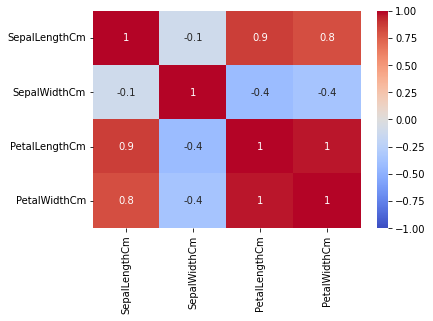

In [ ]:
var=iris.corr()
sns.heatmap(var, xticklabels = var.columns, yticklabels = var.columns, annot=True, center=0, vmin=-1, vmax=1, fmt=".1g", cmap='coolwarm');
plt.show()

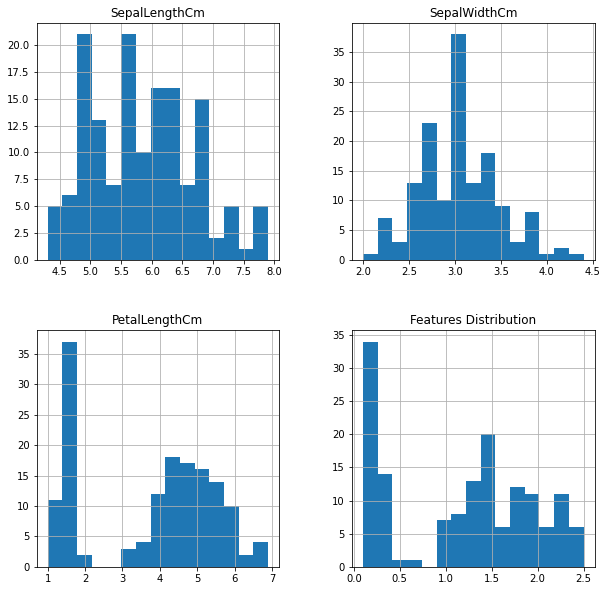

In [ ]:
iris.hist(figsize=(10,10),bins = 15)
plt.title("Features Distribution")
plt.show()

### 3.	Compute a PCA with the maximum number of components.

In [ ]:
iris1 = datasets.load_iris()
#iris

x=iris1.data
print(iris.shape)
y = iris1.target
print(y.shape)

(150, 5)
(150,)


In [ ]:
pca = PCA(n_components = 4)

principal_components = pca.fit(x)

eigenvalues = pca.components_
eigenvalues

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [ ]:
Z = pca.transform(x)

Z.shape

(150, 4)

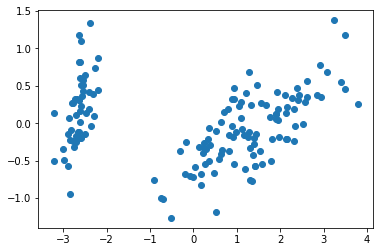

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Z[:,0], Z[:,1]);

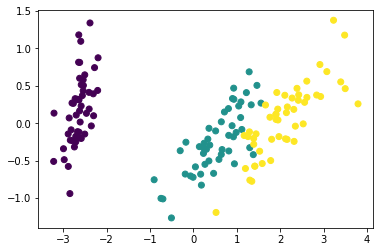

In [ ]:
#Plotting scatter plot for PCA

plt.scatter(Z[:,0], Z[:,1], c=y);

### 4.	Compute the cumulative explained variance ratio. 

In [ ]:
print("Explained Variance is : ",pca.explained_variance_)

variance_explained = pca.explained_variance_ratio_
print("\nExplained Variance ratio is : ",variance_explained)

Explained Variance is :  [4.22824171 0.24267075 0.0782095  0.02383509]

Explained Variance ratio is :  [0.92461872 0.05306648 0.01710261 0.00521218]


### 5.	Determine the number of components 𝐾 by your computed values. 

In [ ]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print("Cumulative variance explained is : ",cumulative_variance_explained)

Cumulative variance explained is :  [0.92461872 0.97768521 0.99478782 1.        ]


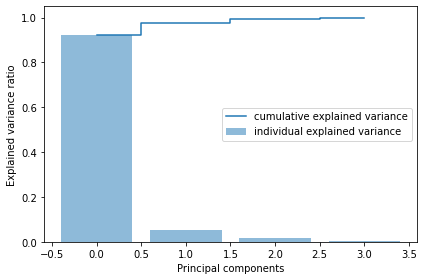

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(range(4), variance_explained, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(4), cumulative_variance_explained, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.tight_layout()

### 6.	Print the 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables. 

In [ ]:
principal_Df = pd.DataFrame(data = Z, columns = ['PC1', 'PC2','PC3','PC4'])

In [ ]:
principal_Df

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [ ]:
#Corelation of principal components with original variables
compare_Df = pd.DataFrame(data = eigenvalues, columns = ['PC1', 'PC2','PC3','PC4'])
compare_Df.insert(0,"Variable",['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm'], True)

compare_Df

,Variable,PC1,PC2,PC3,PC4
0,SepalLengthCm,0.361387,-0.084523,0.856671,0.358289
1,SepalWidthCm,0.656589,0.730161,-0.173373,-0.075481
2,PetalLengthCm,-0.582030,0.597911,0.076236,0.545831
3,PetalWidthCm,-0.315487,0.319723,0.479839,-0.753657


### 7.	Interpret the contribution of the original variables into the PC. 

In [ ]:
#Contribution of variables to PC1

PC1=abs(eigenvalues[0,:])
PC1.sort(axis=0)
PC1=PC1[::-1]
PC1=PC1[0:4]
PC1

array([0.85667061, 0.36138659, 0.3582892 , 0.08452251])

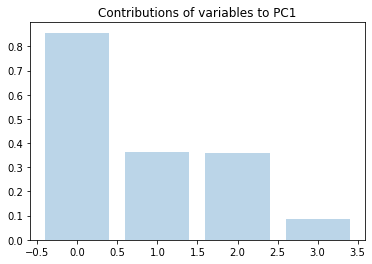

In [ ]:
plt.bar(range(4), PC1, alpha=0.3, align='center')
plt.title('Contributions of variables to PC1');

In [ ]:
#Contribution of variables to PC1

PC2=abs(eigenvalues[1,:])
PC2.sort(axis=0)
PC2=PC2[::-1]
PC2=PC2[0:4]
PC2

array([0.73016143, 0.65658877, 0.17337266, 0.07548102])

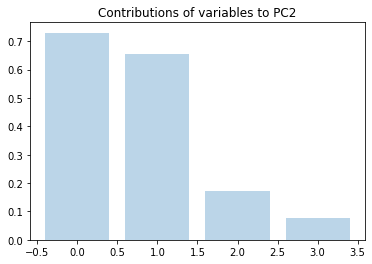

In [ ]:
plt.bar(range(4), PC2, alpha=0.3, align='center')
plt.title('Contributions of variables to PC2');

In [ ]:
#Contribution of variables to PC3

PC3=abs(eigenvalues[2,:])
PC3.sort(axis=0)
PC3=PC3[::-1]
PC3=PC3[0:4]
PC3

array([0.59791083, 0.58202985, 0.54583143, 0.07623608])

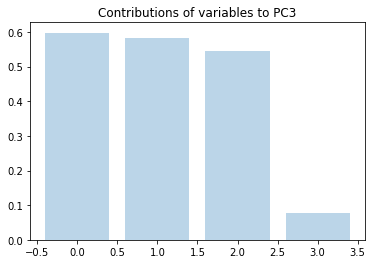

In [ ]:
plt.bar(range(4), PC3, alpha=0.3, align='center')
plt.title('Contributions of variables to PC3');

In [ ]:
#Contribution of variables to PC4

PC4=abs(eigenvalues[3,:])
PC4.sort(axis=0)
PC4=PC4[::-1]
PC4=PC4[0:4]
PC4

array([0.75365743, 0.47983899, 0.3197231 , 0.31548719])

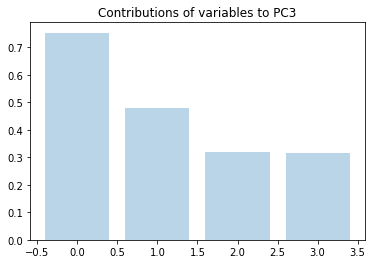

In [ ]:
plt.bar(range(4), PC4, alpha=0.3, align='center')
plt.title('Contributions of variables to PC3');

### 8.	Plot the samples projected into the 𝐾 first PCs. 

In [ ]:
y = iris.iloc[:,4].values

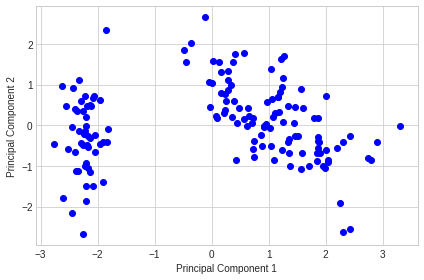

In [ ]:
Y = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab,col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('blue','blue','blue')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()

### 9.	Color samples by their species.

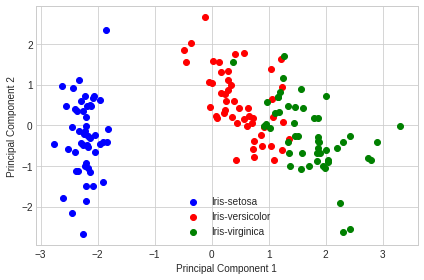

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab,col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('blue','red','green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.legend(loc='lower center')
    plt.show()

Reference :

https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html